In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

np.random.seed(1)

In [2]:
# Load data

train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
train_y.shape

(1, 209)

y = 1. It's a cat picture.


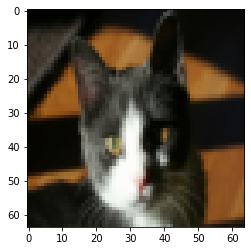

In [3]:
# Examples of a pictures

index = 19
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

y = 0. It's a non-cat picture.


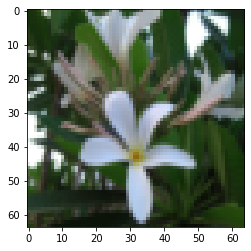

In [4]:
index = 9
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
num_px = train_x_orig.shape[1]
num_px

64

In [6]:
# Reshape the training and test examples

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1

train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x shape (64x64x3=12288): " + str(train_x.shape))
print ("test_x shape (64x64x3=12288): " + str(test_x.shape))

train_x shape (64x64x3=12288): (12288, 209)
test_x shape (64x64x3=12288): (12288, 50)


In [7]:
# two layers model LINEAR->RELU->LINEAR->SIGMOID

### CONSTANTS DEFINING THE MODEL ####

n_x = 12288
n_hid = 7
n_y = 1
layers_dims = (n_x, n_hid, n_y)
print(f'Input size = {n_x}, number of neurons in hidden layer = {n_hid}, number of neurons in output layer = {n_y}')

Input size = 12288, number of neurons in hidden layer = 7, number of neurons in output layer = 1


In [8]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_hid, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                          # number of examples
    (n_x, n_hid, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions that previously implemented    
    parameters = initialize_parameters(n_x, n_hid, n_y)
        
    # Get W1, b1, W2 and b2 from the dictionary parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2"
        # Output: "A1, cache1, A2, cache2".        
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")        
        
        # Compute cost        
        cost = compute_cost(A2, Y)
                
        # Initializing backward propagation for arbitrary activation function
        dA2 = -np.divide(Y, A2) + np.divide(1 - Y, 1 - A2)
        
        # Backward propagation. Inputs: "dA2, cache2, cache1"
        # Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1"   
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")        
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters        
        parameters = update_parameters(parameters, grads, learning_rate)
       
        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354666
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.400797753620389
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.2749137728213018
Cost after iteration 1300: 0.24681768210614832
Cost after iteration 1400: 0.19850735037466102
Cost after iteration 1500: 0.1744831811255661
Cost after iteration 1600: 0.17080762978096234
Cost after iteration 1700: 0.11306524562164724
Cost after iteration 1800: 0.09629426845937153
Cost after iteration 1900: 0.08342617959726864
Cost after iteration 2000: 0.07439078704319083
Cost after iteration 2100: 0.06630748132

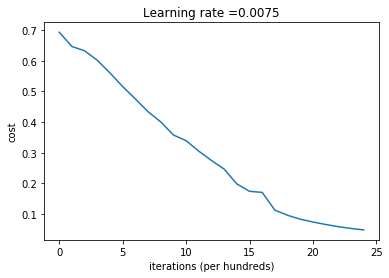

In [9]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_hid, n_y), num_iterations = 2500, print_cost=True)

In [10]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [11]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


In [12]:
# 4-layers model [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID

### CONSTANTS DEFINING THE MODEL ####

layers_dims = [12288, 20, 7, 5, 1]
print(f'Input size = {layers_dims[0]}, number of neurons in 1-st hidden layer = {layers_dims[1]},')
print(f'number of neurons in 2-nd hidden layer = {layers_dims[2]}, number of neurons in 3-d hidden layer = {layers_dims[3]},')
print(f'number of neurons in output layer = {layers_dims[4]}')

Input size = 12288, number of neurons in 1-st hidden layer = 20,
number of neurons in 2-nd hidden layer = 7, number of neurons in 3-d hidden layer = 5,
number of neurons in output layer = 1


In [13]:
# L-layers model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization   
    parameters = initialize_parameters_deep(layers_dims)
        
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID        
        AL, caches = L_model_forward(X, parameters)
                
        # Compute cost        
        cost = compute_cost(AL, Y)
       
        # Backward propagation        
        grads = L_model_backward(AL, Y, caches)        
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


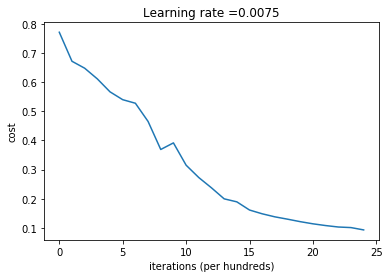

In [14]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [15]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [16]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


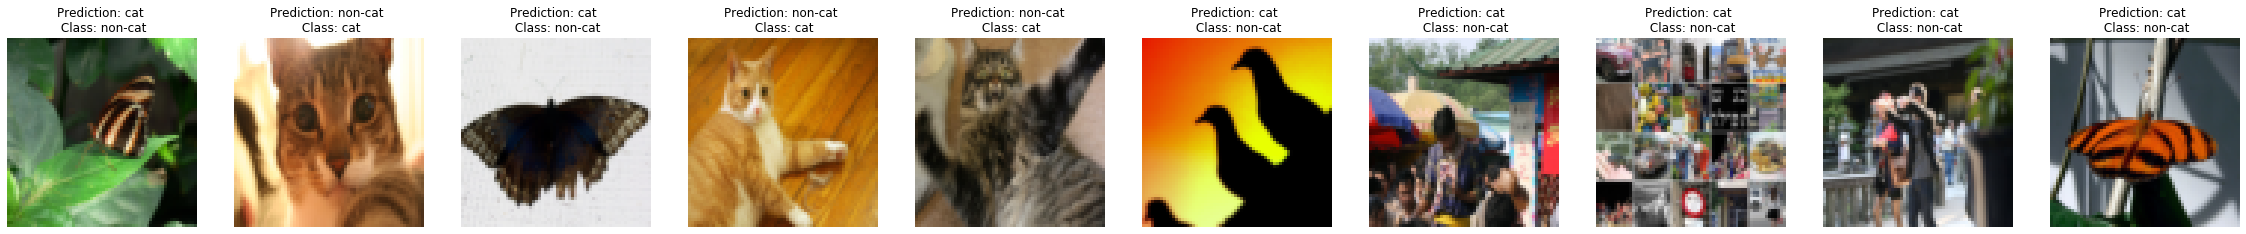

In [17]:
# let's take a look at some images the L-layers model labeled incorrectly

print_mislabeled_images(classes, test_x, test_y, pred_test)

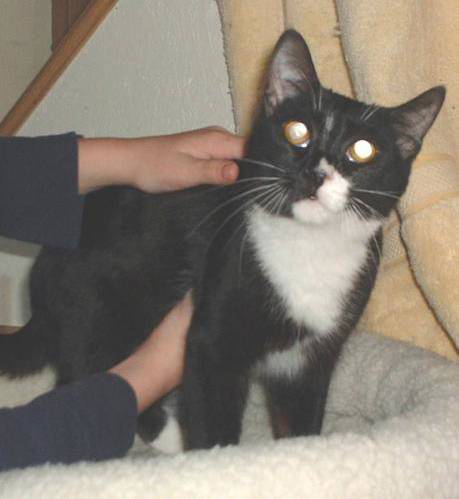

In [18]:
# Example for arbitrary image

from PIL import Image

my_image = "images/cat.jpg"
image_example = Image.open(my_image)

image_example

Accuracy: 1.0
y = 1.0, your L-layers model predicts a "cat" picture.


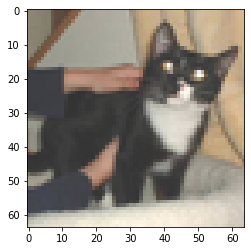

In [19]:
# preprocessing the image for algorithm

image_example = image_example.resize((num_px, num_px))
image_example_arr = np.asarray(image_example)
image_example_arr = image_example_arr / 255.
image_example_flatten = image_example_arr.reshape((num_px*num_px*3, 1))

my_label_y = [1]

my_predicted_image = predict(image_example_flatten, my_label_y, parameters)

plt.figure(figsize=(4, 4))
plt.imshow(image_example_arr)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layers model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In [29]:
# Using tensorflow for solving analogical problem

from tensorflow.keras import layers, models, optimizers

hidden_layer1_size = 20
hidden_layer2_size = 7
hidden_layer3_size = 5
output_size = 1

model = models.Sequential()
model.add(layers.Dense(hidden_layer1_size, activation='relu'))
model.add(layers.Dense(hidden_layer2_size, activation='relu'))
model.add(layers.Dense(hidden_layer3_size, activation='relu'))
model.add(layers.Dense(output_size, activation='sigmoid'))

model.compile(optimizer = optimizers.Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
NUM_EPOCHS = 500

model.fit(train_x.T, train_y.T, epochs = NUM_EPOCHS, verbose=2)

Train on 209 samples
Epoch 1/500
209/209 - 2s - loss: 2.6348 - accuracy: 0.4545
Epoch 2/500
209/209 - 0s - loss: 0.6984 - accuracy: 0.6411
Epoch 3/500
209/209 - 0s - loss: 0.7241 - accuracy: 0.6124
Epoch 4/500
209/209 - 0s - loss: 0.8977 - accuracy: 0.5455
Epoch 5/500
209/209 - 0s - loss: 0.7974 - accuracy: 0.5933
Epoch 6/500
209/209 - 0s - loss: 0.9323 - accuracy: 0.5933
Epoch 7/500
209/209 - 0s - loss: 0.9262 - accuracy: 0.5837
Epoch 8/500
209/209 - 0s - loss: 1.1613 - accuracy: 0.6172
Epoch 9/500
209/209 - 0s - loss: 0.7770 - accuracy: 0.6316
Epoch 10/500
209/209 - 0s - loss: 0.5621 - accuracy: 0.6986
Epoch 11/500
209/209 - 0s - loss: 0.5854 - accuracy: 0.7129
Epoch 12/500
209/209 - 0s - loss: 0.5185 - accuracy: 0.7560
Epoch 13/500
209/209 - 0s - loss: 0.4780 - accuracy: 0.7703
Epoch 14/500
209/209 - 0s - loss: 0.4897 - accuracy: 0.7847
Epoch 15/500
209/209 - 0s - loss: 0.4580 - accuracy: 0.7990
Epoch 16/500
209/209 - 0s - loss: 0.4649 - accuracy: 0.7895
Epoch 17/500
209/209 - 0s - 

Epoch 137/500
209/209 - 0s - loss: 0.0281 - accuracy: 1.0000
Epoch 138/500
209/209 - 0s - loss: 0.0201 - accuracy: 1.0000
Epoch 139/500
209/209 - 0s - loss: 0.0199 - accuracy: 0.9952
Epoch 140/500
209/209 - 0s - loss: 0.0161 - accuracy: 1.0000
Epoch 141/500
209/209 - 0s - loss: 0.0151 - accuracy: 1.0000
Epoch 142/500
209/209 - 0s - loss: 0.0155 - accuracy: 1.0000
Epoch 143/500
209/209 - 0s - loss: 0.0167 - accuracy: 1.0000
Epoch 144/500
209/209 - 0s - loss: 0.0245 - accuracy: 0.9952
Epoch 145/500
209/209 - 0s - loss: 0.0211 - accuracy: 1.0000
Epoch 146/500
209/209 - 0s - loss: 0.0160 - accuracy: 1.0000
Epoch 147/500
209/209 - 0s - loss: 0.0137 - accuracy: 1.0000
Epoch 148/500
209/209 - 0s - loss: 0.0134 - accuracy: 1.0000
Epoch 149/500
209/209 - 0s - loss: 0.0190 - accuracy: 1.0000
Epoch 150/500
209/209 - 0s - loss: 0.0175 - accuracy: 0.9952
Epoch 151/500
209/209 - 0s - loss: 0.0185 - accuracy: 1.0000
Epoch 152/500
209/209 - 0s - loss: 0.0117 - accuracy: 1.0000
Epoch 153/500
209/209 - 

Epoch 272/500
209/209 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 273/500
209/209 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 274/500
209/209 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 275/500
209/209 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 276/500
209/209 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 277/500
209/209 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 278/500
209/209 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 279/500
209/209 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 280/500
209/209 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 281/500
209/209 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 282/500
209/209 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 283/500
209/209 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 284/500
209/209 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 285/500
209/209 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 286/500
209/209 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 287/500
209/209 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 288/500
209/209 - 

Epoch 401/500
209/209 - 0s - loss: 4.7043e-04 - accuracy: 1.0000
Epoch 402/500
209/209 - 0s - loss: 4.6528e-04 - accuracy: 1.0000
Epoch 403/500
209/209 - 0s - loss: 4.6664e-04 - accuracy: 1.0000
Epoch 404/500
209/209 - 0s - loss: 4.6443e-04 - accuracy: 1.0000
Epoch 405/500
209/209 - 0s - loss: 4.5633e-04 - accuracy: 1.0000
Epoch 406/500
209/209 - 0s - loss: 4.5285e-04 - accuracy: 1.0000
Epoch 407/500
209/209 - 0s - loss: 4.5182e-04 - accuracy: 1.0000
Epoch 408/500
209/209 - 0s - loss: 4.4690e-04 - accuracy: 1.0000
Epoch 409/500
209/209 - 0s - loss: 4.4666e-04 - accuracy: 1.0000
Epoch 410/500
209/209 - 0s - loss: 4.4562e-04 - accuracy: 1.0000
Epoch 411/500
209/209 - 0s - loss: 4.4115e-04 - accuracy: 1.0000
Epoch 412/500
209/209 - 0s - loss: 4.3533e-04 - accuracy: 1.0000
Epoch 413/500
209/209 - 0s - loss: 4.2975e-04 - accuracy: 1.0000
Epoch 414/500
209/209 - 0s - loss: 4.2791e-04 - accuracy: 1.0000
Epoch 415/500
209/209 - 0s - loss: 4.2443e-04 - accuracy: 1.0000
Epoch 416/500
209/209 - 0

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              multiple                  245780    
_________________________________________________________________
dense_9 (Dense)              multiple                  147       
_________________________________________________________________
dense_10 (Dense)             multiple                  40        
_________________________________________________________________
dense_11 (Dense)             multiple                  6         
Total params: 245,973
Trainable params: 245,973
Non-trainable params: 0
_________________________________________________________________


In [32]:
test_loss, test_accuracy = model.evaluate(test_x.T, test_y.T)

50/50 [==============================] - 0s 5ms/sample - loss: 2.8008 - accuracy: 0.7200


In [33]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy * 100))

Test loss: 2.80. Test accuracy: 72.00%


In [34]:
prediction_single = model.predict(image_example_flatten.T)

print(prediction_single)

[[0.60372585]]


In [35]:
print('With probability {0:.2f}% this is a cat'.format(prediction_single[0][0] * 100))

With probability 60.37% this is a cat
